## 通用学习模式

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

print(iris_X[:2,:])
print(iris_y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
X_train,X_test,y_train,y_test = train_test_split(iris_X,iris_y,test_size=0.3)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train) #自动训练数据
print(knn.predict(X_test))
print(y_test)

[2 2 1 1 2 2 0 1 2 1 1 1 0 1 1 1 0 0 2 1 1 1 0 2 2 2 0 2 0 0 2 1 1 0 0 1 2
 1 0 2 1 2 1 1 0]
[2 2 1 1 2 2 0 1 2 2 1 1 0 1 1 1 0 0 2 1 1 1 0 2 2 2 0 2 0 0 2 1 1 0 0 1 2
 1 0 2 1 2 1 1 0]


## sklearn的datasets数据库

In [5]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [6]:
loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target

In [7]:
model = LinearRegression()
model.fit(data_X,data_y)

LinearRegression()

In [9]:
print(model.predict(data_X[:4,:]))
print(data_y[:4])

[30.00384338 25.02556238 30.56759672 28.60703649]
[24.  21.6 34.7 33.4]


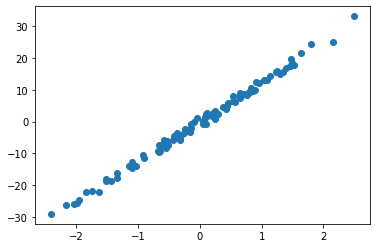

In [11]:
import matplotlib.pyplot as plt
X,y = datasets.make_regression(n_samples=100,n_features=1,n_targets=1,noise=1)
plt.scatter(X,y)
plt.show()

## model常用属性和功能

In [12]:
print(model.predict(data_X[:4,:]))

[30.00384338 25.02556238 30.56759672 28.60703649]


In [13]:
print(model.coef_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [14]:
print(model.intercept_)

36.45948838509001


In [15]:
print(model.score(data_X,data_y)) #R^2

0.7406426641094094


## normalization标准化数据

In [2]:
from sklearn import preprocessing
import numpy as np

In [3]:
a = np.array([[10,2.7,3.6],
             [-100,5,-2],
             [120,20,40]],dtype=np.float64)

In [4]:
print(a)
print(preprocessing.scale(a))

[[  10.     2.7    3.6]
 [-100.     5.    -2. ]
 [ 120.    20.    40. ]]
[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


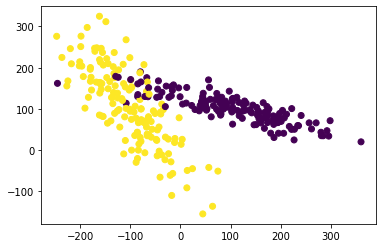

In [6]:
X,y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2,
                          random_state=22, n_clusters_per_class=1, scale=100)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [10]:
X = preprocessing.scale(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
clf = SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))

0.9666666666666667


## cross validation 交叉验证

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
iris = load_iris()
X = iris.data
y = iris.target

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.9736842105263158


In [16]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
print(scores)

[0.96666667 1.         0.93333333 0.96666667 1.        ]


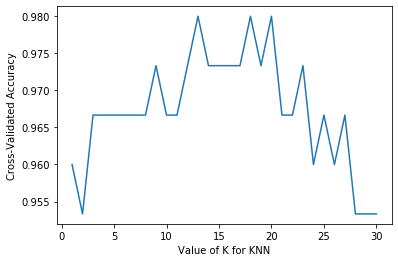

In [17]:
import matplotlib.pyplot as plt
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')#for classification
    #loss = -cross_val_score(knn,X,y.cv=10,scoring='neg_mean_squared_error')#for regression
    k_scores.append(scores.mean())
    
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## 交叉验证2

In [1]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

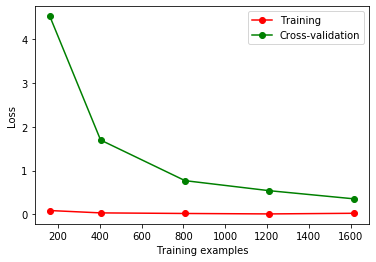

In [3]:
digits = load_digits()
X = digits.data
y = digits.target
train_sizes,train_loss,test_loss=learning_curve(
    SVC(gamma=0.001),X,y,cv=10,scoring='neg_mean_squared_error',
    train_sizes=[0.1,0.25,0.5,0.75,1])
train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)

plt.plot(train_sizes,train_loss_mean,'o-',color="r",
        label="Training")
plt.plot(train_sizes,test_loss_mean,'o-',color="g",
        label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

## 交叉验证3

In [1]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

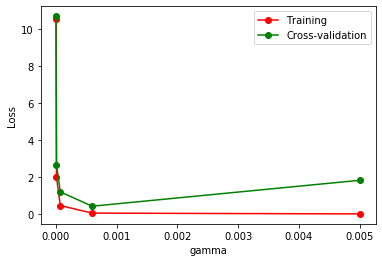

In [2]:
digits = load_digits()
X = digits.data
y = digits.target
param_range = np.logspace(-6,-2.3,5)
train_loss,test_loss=validation_curve(
    SVC(),X,y,param_name='gamma',param_range=param_range,cv=10,
    scoring='neg_mean_squared_error')
train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)

plt.plot(param_range,train_loss_mean,'o-',color="r",
        label="Training")
plt.plot(param_range,test_loss_mean,'o-',color="g",
        label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

## save

In [3]:
from sklearn import datasets
from sklearn import svm

In [4]:
clf = svm.SVC()
iris = datasets.load_iris()
X,y = iris.data,iris.target
clf.fit(X,y)

SVC()

In [6]:
# method1:pickle
! pip install pickle
import pickle
#save
with open('save/clf.pickle','wb') as f:
    pickle.dump(clf,f)
#restore
with open('save/clf.pickle','rb') as f:
    clf2 = pickle.load(f)
    print(clf2.predict(X[0:1]))

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
[0]


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [7]:
# method2:joblib
import joblib
#save
joblib.dump(clf,'save/clf.pkl')
#restore
clf3 = joblib.load('save/clf.pkl')
print(clf2.predict(X[0:1]))

[0]
